============= Tim Analis =============
1. M NAUVAL IZUL HAQ GUNAEPI - 10124001
2. Aditya Firdaus - 10124005

============== LAPORAN ==============

3. ARKAN RAMADHAN ASYIKIN - 10124018

========== PROJECT MANAGER ==========

4. AHMAD MULYANA - 10124029

============ BACKEND DEV ============

5. MOCHAMMAD FAHRIZA PRATAMA - 10124033

============= FRONTEND ==============

6. AKBAR KARUNIA PUTRA - 10124035





In [ ]:
import zipfile
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Mengekstrak File ZIP
zip_name = 'Bike-sharing-dataset.zip'

if os.path.exists(zip_name):
    with zipfile.ZipFile(zip_name, 'r') as zip_ref:
        zip_ref.extractall('bike_data')
    print(" File ZIP berhasil diekstrak ke folder 'bike_data'")
else:
    print(" File ZIP tidak ditemukan. Silakan upload file .")

# 2. Load Data Awal
df = pd.read_csv('bike_data/Bike-sharing-dataset/day.csv')
print("Data mentah berhasil dimuat. Total baris:", len(df))

 File ZIP berhasil diekstrak ke folder 'bike_data'
Data mentah berhasil dimuat. Total baris: 731


In [ ]:

# 1. Konversi Tipe Data
df['dteday'] = pd.to_datetime(df['dteday'])

# 2. Pembersihan Outlier dengan Metode IQR (Interquartile Range)
# Rumus: [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter data
df_clean = df[(df['cnt'] >= lower_limit) & (df['cnt'] <= upper_limit)].copy()

# 3. Menyiapkan Dataframe untuk Visualisasi (Insight Dasar)
df_monthly = df_clean.resample(rule='M', on='dteday').agg({"cnt": "sum"}).reset_index()

season_map = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_season = df_clean.copy()
df_season['season_label'] = df_season['season'].map(season_map)

# Simpan hasil
df_clean.to_csv('bike_clean_only.csv', index=False)
print(f" Data Cleaning Selesai. Outlier dibuang: {len(df) - len(df_clean)} baris.")

 Data Cleaning Selesai. Outlier dibuang: 0 baris.


/tmp/ipython-input-1832564126.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_clean.resample(rule='M', on='dteday').agg({"cnt": "sum"}).reset_index()


In [ ]:
# ==========================================
# TAMBAHAN: ANALISIS RATA-RATA (DESCRIPTIVE STATS)
# ==========================================

print("--- Analisis Statistik Rata-rata ---")

# 1. Rata-rata Keseluruhan Fitur Utama
avg_overall = df_clean[['temp', 'hum', 'windspeed', 'cnt']].mean()
print("\n1. Rata-rata Keseluruhan :")
print(avg_overall)

# 2. Rata-rata Penyewaan Berdasarkan Musim (Season)
avg_by_season = df_clean.groupby('season')['cnt'].mean().reset_index()
avg_by_season['season_name'] = avg_by_season['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
print("\n2. Rata-rata Penyewaan per Musim:")
print(avg_by_season[['season_name', 'cnt']])

# 3. Rata-rata Penyewaan Berdasarkan Hari Kerja vs Hari Libur
avg_workingday = df_clean.groupby('workingday')['cnt'].mean()
print("\n3. Rata-rata Penyewaan (0: Hari Libur, 1: Hari Kerja):")
print(avg_workingday)

# 4. Korelasi
correlation = df_clean[['temp', 'hum', 'windspeed', 'cnt']].corr()['cnt']
print("\n4. Korelasi Fitur terhadap Jumlah Penyewaan (cnt):")
print(correlation)

print("\n--- Analisis Selesai, Siap Masuk ke Modeling ---")

--- Analisis Statistik Rata-rata ---

1. Rata-rata Keseluruhan :
temp            0.495385
hum             0.627894
windspeed       0.190486
cnt          4504.348837
dtype: float64

2. Rata-rata Penyewaan per Musim:
  season_name          cnt
0      Spring  2604.132597
1      Summer  4992.331522
2        Fall  5644.303191
3      Winter  4728.162921

3. Rata-rata Penyewaan (0: Hari Libur, 1: Hari Kerja):
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64

4. Korelasi Fitur terhadap Jumlah Penyewaan (cnt):
temp         0.627494
hum         -0.100659
windspeed   -0.234545
cnt          1.000000
Name: cnt, dtype: float64

--- Analisis Selesai, Siap Masuk ke Modeling ---


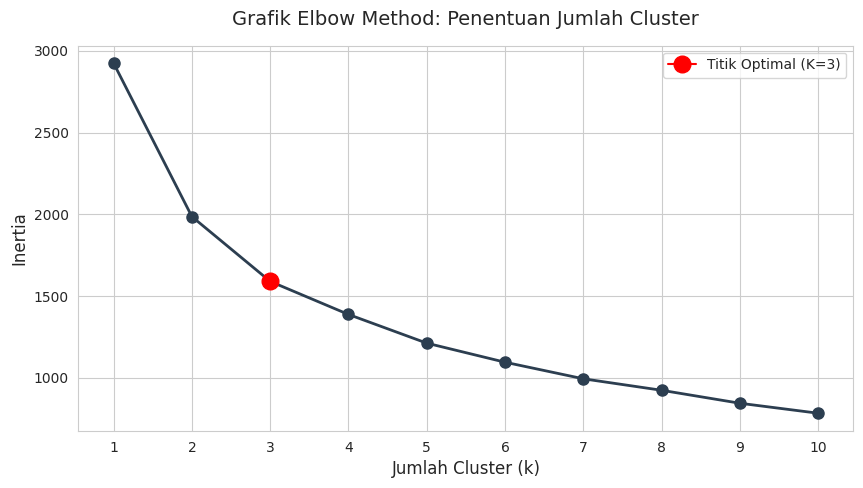

✅ Modeling Selesai.


In [ ]:

# 1. Persiapan Data (Semua kolom asli dipertahankan)
data_full = pd.read_csv('bike_clean_only.csv')

# Pilih fitur untuk Clustering
features_for_clustering = ['temp', 'hum', 'windspeed', 'cnt']
x = data_full[features_for_clustering]

# 2. Scaling Data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 3. Mencari K Optimal (Elbow Method) - VERSI BERSIH
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Plot garis utama
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='#2c3e50', linewidth=2, markersize=8)

# Highlight titik K=3 (Siku) dengan warna berbeda tanpa panah
plt.plot(3, inertia[2], marker='o', color='red', markersize=12, label='Titik Optimal (K=3)')

plt.title('Grafik Elbow Method: Penentuan Jumlah Cluster', fontsize=14, pad=15)
plt.xlabel('Jumlah Cluster (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(range(1, 11))
plt.legend()
plt.show()

# 4. Running K-Means
k_final = 3
model = KMeans(n_clusters=k_final, random_state=42, n_init=10)
data_full['cluster'] = model.fit_predict(x_scaled)

# 5. Labeling Otomatis
means = data_full.groupby('cluster')['cnt'].mean().sort_values()
mapping = {
    means.index[0]: "Hari Sepi",
    means.index[1]: "Hari Normal",
    means.index[2]: "Hari Ramai"
}
data_full['cluster_tag'] = data_full['cluster'].map(mapping)


# Export Final dengan SEMUA variabel asli tetap ada
data_full.to_csv('bike_final_complete_data.csv', index=False)
print("✅ Modeling Selesai.")

In [ ]:
# Menghitung rata-rata fitur per cluster
profile = data_full.groupby('cluster_tag')[['temp', 'hum', 'windspeed', 'cnt']].mean()
print(profile)

                 temp       hum  windspeed          cnt
cluster_tag                                            
Hari Normal  0.324742  0.491148   0.245564  3340.596939
Hari Ramai   0.648360  0.626141   0.168118  5981.884956
Hari Sepi    0.401444  0.767672   0.174097  3112.566327
